In [26]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [27]:
N_MFCCS=20

In [28]:
def extract_mfcc_features(file, n_mfccs=10):
    signal, sampling_rate = librosa.load(file)
    mfcc = librosa.feature.mfcc(signal, n_mfcc=n_mfccs, sr=sampling_rate)
    return mfcc, sampling_rate

In [29]:
training_set_dir = os.path.join('data', 'train-set')
dev_set_dir = os.path.join('data', 'dev-set')
test_set_dir = os.path.join('data', 'test-set')

In [30]:
dev_set_dir_on = os.path.join(dev_set_dir, 'on')
dev_set_dir_off = os.path.join(dev_set_dir, 'off')
dev_set_dir_other = os.path.join(dev_set_dir, 'other')

example_file_on = os.path.join(dev_set_dir_on, np.random.choice(os.listdir(dev_set_dir_on)))
example_file_off = os.path.join(dev_set_dir_off, np.random.choice(os.listdir(dev_set_dir_off)))
example_file_other = os.path.join(dev_set_dir_other, np.random.choice(os.listdir(dev_set_dir_other)))

In [31]:
example_features_on, sampling_rate_on = extract_mfcc_features(example_file_on, n_mfccs=N_MFCCS)
example_features_off, sampling_rate_off = extract_mfcc_features(example_file_off, n_mfccs=N_MFCCS)
example_features_other, sampling_rate_other = extract_mfcc_features(example_file_other, n_mfccs=N_MFCCS)

In [32]:
sampling_rate_on

22050

In [33]:
example_features_on

array([[-4.56377869e+02, -4.56840179e+02, -4.58267578e+02,
        -4.56600464e+02, -4.53495300e+02, -4.53563690e+02,
        -4.51006897e+02, -4.50701935e+02, -4.54136566e+02,
        -4.42165283e+02, -4.30945709e+02, -4.20992584e+02,
        -4.18968048e+02, -4.16289246e+02, -4.16125549e+02,
        -4.19129547e+02, -4.23947784e+02, -4.32147461e+02,
        -4.39526428e+02, -4.38303009e+02, -4.39359100e+02,
        -4.39519501e+02, -4.42358612e+02, -4.48576416e+02,
        -4.54005371e+02, -4.56466858e+02, -4.58469543e+02,
        -4.59599030e+02, -4.55613953e+02, -4.53321289e+02,
        -4.58000793e+02, -4.58679840e+02, -4.58915924e+02,
        -4.56648560e+02, -4.53537018e+02, -4.49057861e+02,
        -4.49879730e+02, -4.51865662e+02, -4.45768402e+02,
        -4.42802124e+02, -4.49886597e+02, -4.59337067e+02,
        -4.43049225e+02, -4.21601715e+02],
       [ 2.42568329e+02,  2.45811371e+02,  2.47630585e+02,
         2.51947418e+02,  2.51742172e+02,  2.46781952e+02,
         2.49

In [34]:
example_features_on.shape

(20, 44)

In [35]:
example_features_off.shape

(20, 44)

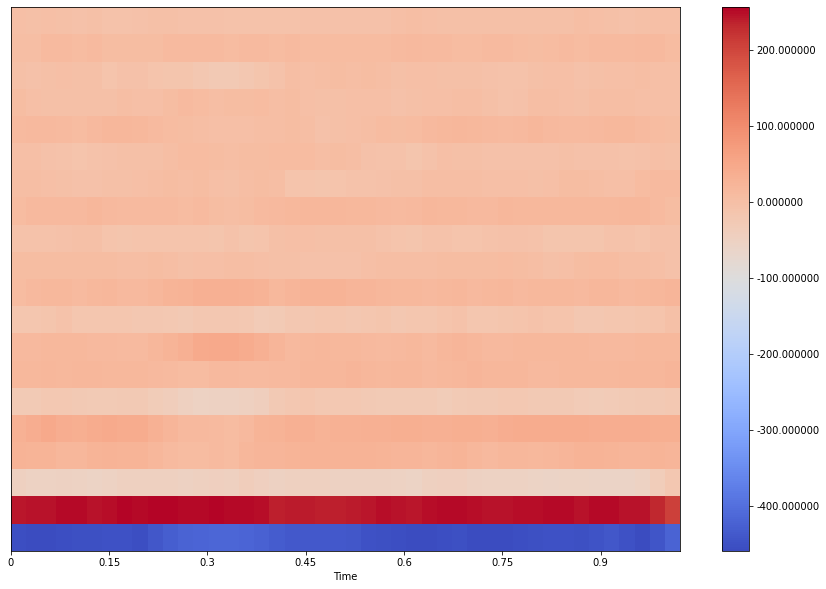

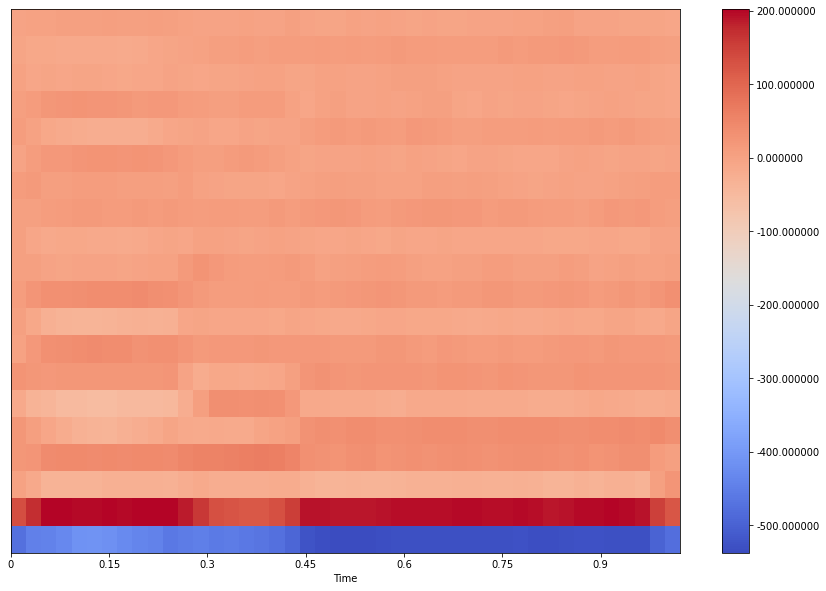

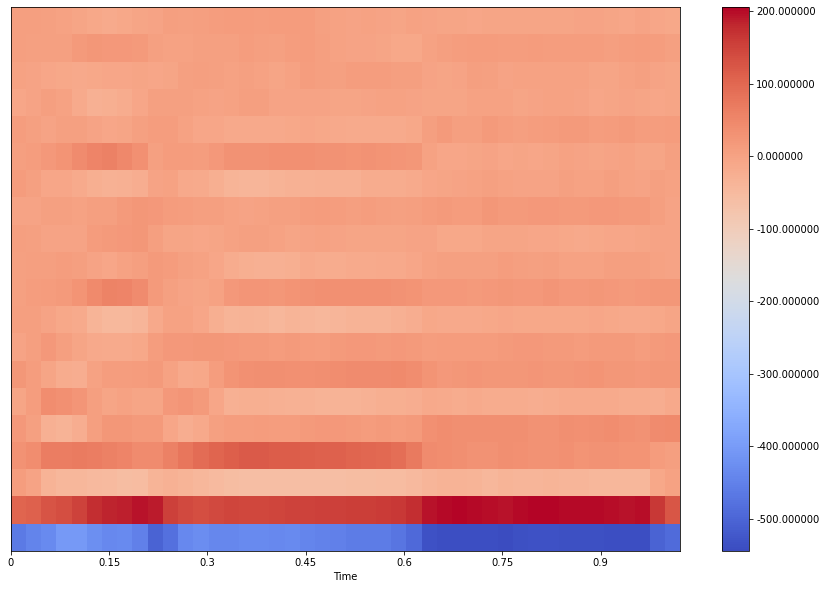

In [36]:
plt.figure(figsize=(15,10))
librosa.display.specshow(example_features_on, x_axis='time', sr=sampling_rate_on)
plt.colorbar(format='%2f')
plt.show()

plt.figure(figsize=(15,10))
librosa.display.specshow(example_features_off, x_axis='time', sr=sampling_rate_off)
plt.colorbar(format='%2f')
plt.show()

plt.figure(figsize=(15,10))
librosa.display.specshow(example_features_other, x_axis='time', sr=sampling_rate_other)
plt.colorbar(format='%2f')
plt.show()

In [37]:
x_shape = example_features_on.shape

In [38]:
x_shape

(20, 44)

In [39]:
training_set_size = sum([len(os.listdir(os.path.join(training_set_dir,dir_))) for dir_ in os.listdir(training_set_dir)])
dev_set_size = sum([len(os.listdir(os.path.join(dev_set_dir,dir_))) for dir_ in os.listdir(dev_set_dir)])
test_set_size = sum([len(os.listdir(os.path.join(test_set_dir,dir_))) for dir_ in os.listdir(test_set_dir)])

In [40]:
training_set_size

41849

In [41]:
dev_set_size

20922

In [42]:
test_set_size

20927

In [43]:
class_labels = {
    'on': 0,
    'off': 1,
    'left': 2,
    'right': 3,
    'up': 4,
    'down': 5,
    'zero': 6,
    'one': 7,
    'two': 8,
    'three': 9,
    'four': 10,
    'five': 11,
    'six': 12,
    'seven': 13,
    'eight': 14,
    'nine': 15,
    'other': 16
}

In [44]:
def convert_label_to_one_hot(label):
    vec = np.zeros(17)
    vec[label] = 1
    return vec

In [45]:
def preprocess_set(set_dir):
    features = list()
    labels = list()
    class_dirs = [
        'on', 'off', 'left', 'right', 'up', 'down',
        'zero', 'one', 'two', 'three', 'four', 'five',
        'six', 'seven', 'eight', 'nine', 'other'
    ]
    for class_ in class_dirs:
        class_dir = os.path.join(set_dir, class_)
        files = os.listdir(class_dir)
        for file in files:
            full_filename = os.path.join(class_dir, file)
            mfcc, _ = extract_mfcc_features(full_filename, n_mfccs=N_MFCCS)
            features.append(mfcc)
        oh = convert_label_to_one_hot(class_labels[class_])
        labels += [oh for file in files]
    return np.stack(features), np.stack(labels)

In [47]:
training_set = preprocess_set(training_set_dir)

In [48]:
training_set_features, training_set_labels = training_set

In [49]:
training_set_labels.shape

(41849, 17)

In [50]:
training_set_features.shape

(41849, 20, 44)

In [51]:
dev_set = preprocess_set(dev_set_dir)
test_set = preprocess_set(test_set_dir)

In [52]:
dev_set_features, dev_set_labels = dev_set

In [53]:
dev_set_features.shape

(20922, 20, 44)

In [54]:
dev_set_labels.shape

(20922, 17)

In [55]:
dev_set_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [56]:
test_set_features, test_set_labels = test_set

In [57]:
test_set_features.shape

(20927, 20, 44)

In [58]:
test_set_labels.shape

(20927, 17)

In [59]:
np.save('training-features', training_set_features)
np.save('training-labels', training_set_labels)
np.save('dev-features', dev_set_features)
np.save('dev-labels', dev_set_labels)
np.save('test-features', test_set_features)
np.save('test-labels', test_set_labels)